## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# 讀取資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [4]:
print(regr.coef_)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [5]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


## LASSO

In [6]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
lasso.coef_

array([-0.10618872,  0.04886351, -0.04536655,  1.14953069, -0.        ,
        3.82353877, -0.02089779, -1.23590613,  0.26008876, -0.01517094,
       -0.74673362,  0.00963864, -0.49877104])

In [7]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 26.45


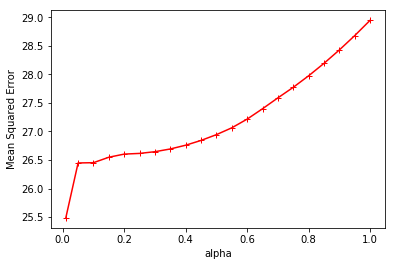

In [8]:
Alpha = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
mse = []
for a in Alpha:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(Alpha, mse, 'r+-')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.show()

## Ridge

In [9]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
ridge.coef_

array([-1.15381303e-01,  4.72528249e-02,  2.87371589e-03,  3.19642306e+00,
       -1.54713824e+01,  3.89388927e+00, -1.19943742e-02, -1.52347878e+00,
        2.90133016e-01, -1.34816989e-02, -8.93679905e-01,  8.86599187e-03,
       -4.58983115e-01])

In [10]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.46


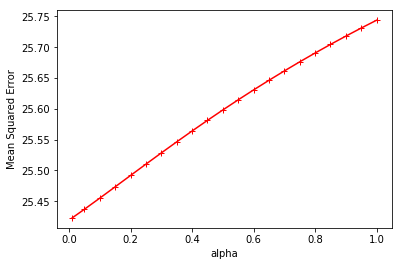

In [11]:
mse = []
for a in Alpha:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

plt.plot(Alpha, mse, 'r+-')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.show()